<a href="https://colab.research.google.com/github/Jed-77/tensorflow-deeplearning/blob/master/TF2_0_ANN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Using Tensorflow to recognise handwritten digits from MNIST database.**

In [0]:
# Install Tensorflow
import tensorflow as tf
print(tf.__version__)

2.2.0


In [0]:
# Model Hyperparameters
# n=number, a=activation
IMAGE_SCALE = 255.0
N_HIDDEN_1 = 128
A_HIDDEN_1 = 'relu'
DROPOUT_PROB = 0.2
N_TARGET = 10
A_TARGET = 'softmax'
OPTIMIZING_FUNCTION = 'adam'
LOSS_FUNCTION = 'sparse_categorical_crossentropy'
NUM_EPOCHS=10

In [0]:
# Load in the data. 
# Note it is broken out into training and testing already. 
# Also we will normalise the values from 0->255 to 0->1
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train/IMAGE_SCALE, x_test/IMAGE_SCALE
print("x_train shape: ", x_train.shape)
n_train, image_size_x, image_size_y = x_train.shape
print("y_train shape: ", y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train shape:  (60000, 28, 28)
y_train shape:  (60000,)


In [0]:
# Build the model
# 1) first layer is to the flatten the input shape into a vector
# 2) next we add a dense layer
# 3) then dropout random nodes to prevent overfitting and over-weighting one neuron
# 4) output should be a probability so softmax and range from 0 -> 9 (so 1-10)
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(image_size_x, image_size_y)),
  tf.keras.layers.Dense(N_HIDDEN_1, activation=A_HIDDEN_1),
  tf.keras.layers.Dropout(DROPOUT_PROB),
  tf.keras.layers.Dense(N_TARGET, activation=A_TARGET)
])

In [0]:
# Compile the model (prepare for training)
model.compile(optimizer=OPTIMIZING_FUNCTION,
              loss=LOSS_FUNCTION,
              metrics=['accuracy'])

In [0]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=NUM_EPOCHS)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2949 - accuracy: 0.9146 - val_loss: 0.1403 - val_accuracy: 0.9597
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1421 - accuracy: 0.9582 - val_loss: 0.0989 - val_accuracy: 0.9712
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1056 - accuracy: 0.9679 - val_loss: 0.0883 - val_accuracy: 0.9735
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0878 - accuracy: 0.9726 - val_loss: 0.0795 - val_accuracy: 0.9765
Epoch 5/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0741 - accuracy: 0.9774 - val_loss: 0.0731 - val_accuracy: 0.9784
Epoch 6/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0652 - accuracy: 0.9793 - val_loss: 0.0688 - val_accuracy: 0.9789
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.0582 - accuracy: 0.9816 - val_loss: 0.0729 - val_accuracy:

In [0]:
# Plot the loss per iteration
import matplotlib.pyplot as plt
from matplotlib import style
style.use('dark_background')
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

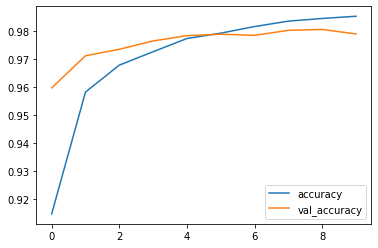

In [0]:
# Plot the accuracy per iteration
import matplotlib.pyplot as plt
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val_accuracy')
plt.legend()

In [0]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 0s 1ms/step - loss: 0.0739 - accuracy: 0.9801
[0.07394124567508698, 0.9800999760627747]


Non-normalised Confusion Matrix
[[ 970    1    1    1    0    0    3    1    3    0]
 [   0 1125    3    2    0    0    2    0    3    0]
 [   0    0 1016    2    2    0    2    3    6    1]
 [   0    0    3 1000    0    1    0    2    4    0]
 [   0    1    6    0  963    0    3    2    2    5]
 [   2    0    0   11    2  860    5    2    9    1]
 [   4    2    2    1    4    2  940    0    3    0]
 [   2    5   10    4    1    0    0  997    5    4]
 [   4    0    2    5    3    1    1    3  952    3]
 [   2    6    0    8   14    3    0    5    4  967]]


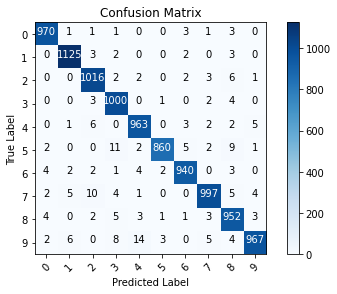

In [0]:
# Plot a confusion matrix
from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes,
                          normalise=False,
                          title='Confusion Matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  """
  if normalise:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalised Confusion Matrix.")
  else:
    print("Non-normalised Confusion Matrix")
  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt='.2f' if normalise else 'd'
  thresh = cm.max()/2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black"
             )
  plt.tight_layout()
  plt.ylabel('True Label')
  plt.xlabel('Predicted Label')
  plt.show()


# run this
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

Text(0.5, 1.0, 'True: 6, Predicted: 0')

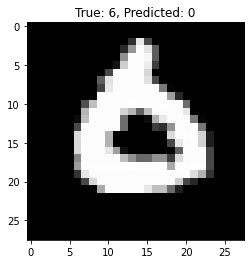

In [0]:
# Show some of the misclassified examples
import numpy as np
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True: {}, Predicted: {}".format(y_test[i], p_test[i]))